# Q1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## we have no missing values

In [6]:
df.cp.unique()

array([3, 2, 1, 0])

In [7]:
df.fbs.unique()

array([1, 0])

In [8]:
df.restecg.unique()

array([0, 1, 2])

In [9]:
df.exang.unique()

array([0, 1])

In [10]:
df.slope.unique()

array([0, 2, 1])

In [11]:
df.ca.unique()

array([0, 2, 1, 3, 4])

In [12]:
df.thal.unique()

array([1, 2, 3, 0])

In [13]:
# Therefore we divide the data into categorical and numerical data
categorical_cols=['cp','fbs','restecg','exang','slope','ca','thal']
numerical_cols=['age','trestbps','chol','thalach','oldpeak']

## We can see that the data has categorical columns but are already encoded therefore encoding is not required. 
# Also scaling is not required because we are performing random forest classifier algorithm which uses decision tree and scaling is not that important.

# Q2

In [14]:
X=df.drop('target',axis=1)
y=df.target

In [19]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

# Q3

In [24]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=10)

In [25]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [26]:
y_pred=rfc.predict(X_test)

# Q4

In [27]:
# metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[35 15]
 [ 5 36]]
0.7802197802197802
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        50
           1       0.71      0.88      0.78        41

    accuracy                           0.78        91
   macro avg       0.79      0.79      0.78        91
weighted avg       0.80      0.78      0.78        91



# Q5

In [28]:
importance=rfc.feature_importances_

In [30]:
feature_importance=pd.DataFrame({'features':X.columns,'Importance':importance})

In [31]:
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)

In [32]:
feature_importance

,features,Importance
2,cp,0.156555
7,thalach,0.129772
11,ca,0.118811
0,age,0.091296
9,oldpeak,0.087908
3,trestbps,0.078313
4,chol,0.077326
10,slope,0.069409
12,thal,0.065044
8,exang,0.063355


In [33]:
top_5_features=feature_importance.head(5)

In [34]:
top_5_features

,features,Importance
2,cp,0.156555
7,thalach,0.129772
11,ca,0.118811
0,age,0.091296
9,oldpeak,0.087908


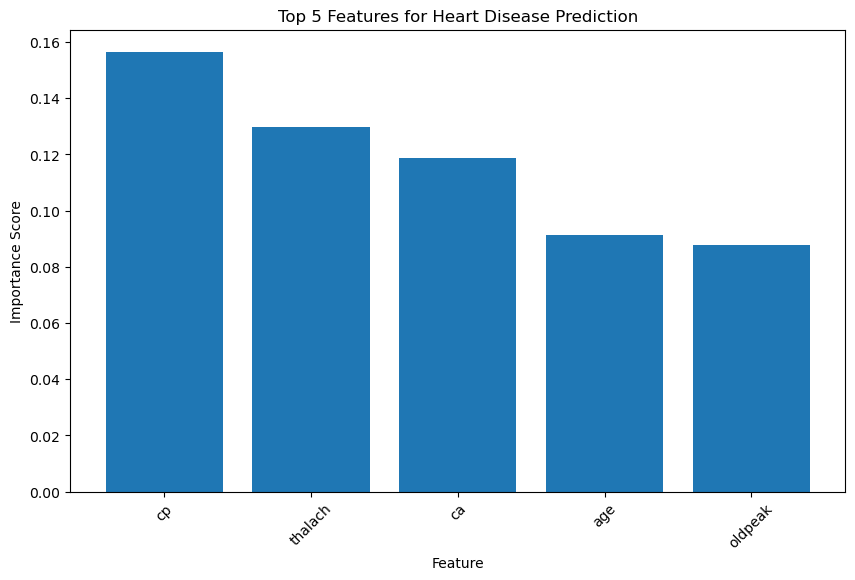

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_features['features'], top_5_features['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 5 Features for Heart Disease Prediction')
plt.xticks(rotation=45)
plt.show()

# Q6)

In [36]:
# Hyperparameter tuning
params={'n_estimators':[100,200,300,400],
        'max_depth':[2,3,4,5],
        'min_samples_split':[2,3,4,5],
        'min_samples_leaf':[1,2]
}

from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(rfc,param_grid=params,refit=True,cv=5,verbose=3)

In [37]:
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.791 total time=   0.2s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.2s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.881 total time=   0.2s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.810 total time=   0.2s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.791 total time=   0.4s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.4s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.929 total time=   0.4s
[

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=3)

# Q7

In [38]:
grid_cv.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

## We can see that the best parameters are max_depth=3,min_samples_leaf=1,min_samples_split=2,n_estimators=200

In [39]:
rfc_tuned=RandomForestClassifier(n_estimators=200,max_depth=3,min_samples_leaf=1,min_samples_split=2)

In [40]:
rfc_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=200)

In [41]:
y_pred_tuned=rfc_tuned.predict(X_test)

In [42]:
# metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_tuned))
print(accuracy_score(y_test,y_pred_tuned))
print(classification_report(y_test,y_pred_tuned))

[[35 15]
 [ 3 38]]
0.8021978021978022
              precision    recall  f1-score   support

           0       0.92      0.70      0.80        50
           1       0.72      0.93      0.81        41

    accuracy                           0.80        91
   macro avg       0.82      0.81      0.80        91
weighted avg       0.83      0.80      0.80        91



# The accuracy from the tuned model is 80.219%
# The accuracy from the base model is 78.219%
# We can comfortably say that the accuracy has increased by hyperparameter tuning.

# Q8

In [45]:
# Extracting the two most important features:-
feature1 = top_5_features.iloc[0]['features']
feature2 = top_5_features.iloc[1]['features']

X_top_2=X_train[[feature1,feature2]]

In [46]:
# Training the model for those 2 features with best parameters recieved from hyperparameter tuning.


In [47]:
rfc_tuned.fit(X_top_2,y_train)

RandomForestClassifier(max_depth=3, n_estimators=200)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


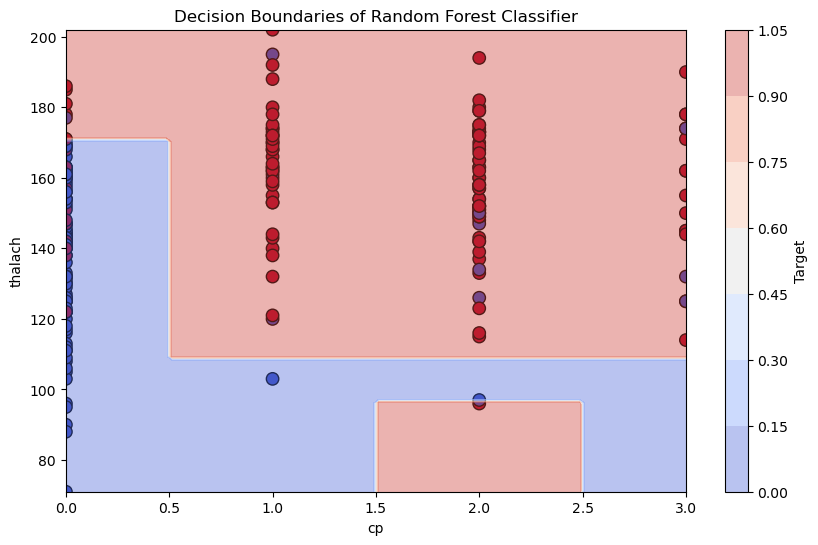

In [49]:
# Define the range of values for the two features to create a grid for decision boundary plotting
feature1_range = np.linspace(X_top_2[feature1].min(), X_top_2[feature1].max(), 100)
feature2_range = np.linspace(X_top_2[feature2].min(), X_top_2[feature2].max(), 100)
feature1_grid, feature2_grid = np.meshgrid(feature1_range, feature2_range)
feature1_flat, feature2_flat = feature1_grid.flatten(), feature2_grid.flatten()
feature_values_grid = np.c_[feature1_flat, feature2_flat]

# Predict the class labels for the grid of feature values
predicted_labels = rfc_tuned.predict(feature_values_grid)

# Plot the decision boundaries along with the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_top_2[feature1], X_top_2[feature2], c=y_train, cmap='coolwarm', edgecolors='k', s=80)
plt.contourf(feature1_grid, feature2_grid, predicted_labels.reshape(feature1_grid.shape), alpha=0.4, cmap='coolwarm')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries of Random Forest Classifier')
plt.colorbar(label='Target')
plt.show()

# Insights and Limitations of the Model:

# Decision Boundaries: 
The decision boundaries plotted on the scatter plot show how the Random Forest Classifier separates the data into different classes (heart disease risk levels) based on the two most important features which are 'cp' and 'thalach'. The decision boundaries reveals patterns and regions in the feature space where the model predicts different risk levels.

# Predictive Power:
The model's ability to capture complex interactions between the two most important features is evident in the decision boundaries. Regions with distinct colors suggest areas where the model is confident in its predictions. This is indicative of well-separated classes and strong predictive power.

# Limitations: 
While the Random Forest Classifier is effective in capturing complex relationships, it  still has limitations. For example, the model's decision boundary is not consistent across the entire feature space,this happens especially if the data contains noisy or ambiguous regions. Additionally, the decision boundaries might not be able to capture certain rare or nonlinear patterns present in the data.